In [1]:
import ROOT
import math

Welcome to JupyROOT 6.26/02


In [2]:
#Read the data in

inputFile =  ROOT.TFile("data.root")
tree = inputFile.Get("sig")

In [3]:
xmin = 0.0
xmax = 500.0

# Define the model

x = ROOT.RooRealVar("x", "x", xmin, xmax);
oneovertau = ROOT.RooRealVar("oneovertau", "oneovertau", -0.02, -0.1, -0.003)
sigma = ROOT.RooRealVar("sigma", "sigma", 5, 0.1, 10)
mass = ROOT.RooRealVar("mass", "mass",  110, 140)
nbkg = ROOT.RooRealVar("nbkg", "nbkg", 3000., 4000.)
nsig = ROOT.RooRealVar("nsig", "nsig", 0., 300.)
expo = ROOT.RooExponential("expo","exponential function", x, oneovertau)
gaus = ROOT.RooGaussian("gaus", "gaussian function", x, mass, sigma)
modelSB = ROOT.RooAddPdf("modelSB","modelSB", ROOT.RooArgList(gaus,expo), ROOT.RooArgList(nsig,nbkg))

In [4]:
# convert the data into a RooDataset
data = ROOT.RooDataSet("data","dataset with x", tree, ROOT.RooArgSet(x))
data.Print()

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #53 because x cannot accommodate the value 506.767
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #143 because x cannot accommodate the value 563.26
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #343 because x cannot accommodate the value 556.639
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #459 because x cannot accommodate the value 680.291
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 24 out-of-range events
RooDataSet::data[x] = 3955 entries


In [5]:
# Fit the model to the data
resSB = modelSB.fitTo(data, ROOT.RooFit.Save(True), ROOT.RooFit.Minos(True))

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gaus,expo)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mass         1.25000e+02  3.00000e+00    1.10000e+02  1.40000e+02
     2 nbkg         3.50000e+03  1.00000e+02    3.00000e+03  4.00000e+03
     3 nsig         1.50000e+02  3.00000e+01    0.00000e+00  3.00000e+02
     4 oneovertau  -2.00000e-02  8.50000e-03   -1.00000e-01 -3.00000e-03
     5 sigma        5.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR

In [6]:
fittedValLambda = oneovertau.getVal()

[#1] INFO:Plotting -- RooAbsPdf::plotOn(modelSB) directly selected PDF components: (expo)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(modelSB) indirectly selected PDF components: ()


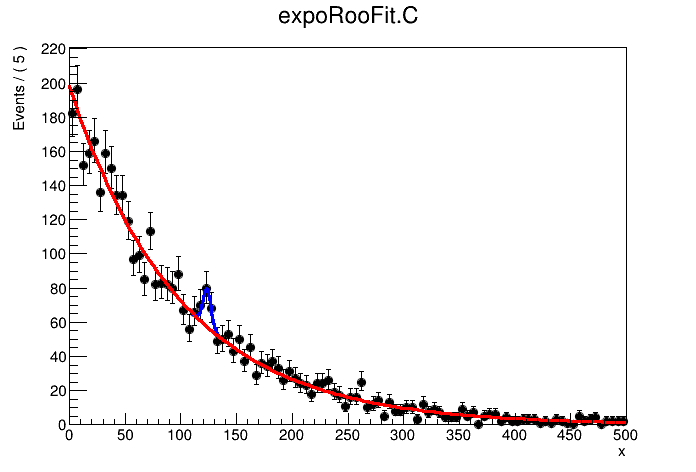

In [7]:
# plot results
canvas = ROOT.TCanvas()
canvas.cd()
xframe = x.frame(ROOT.RooFit.Title("expoRooFit.C"),ROOT.RooFit.Bins(100),ROOT.RooFit.Range(0.,500.))
data.plotOn(xframe)
modelSB.plotOn(xframe)
modelSB.plotOn(xframe, ROOT.RooFit.Components('expo'), ROOT.RooFit.LineColor(ROOT.kRed))
xframe.Draw()
ROOT.gPad.Draw()

In [8]:
# now redo the steps by hand
# 1. construct the negative log likelihood 
nll = modelSB.createNLL(data) 
# 2. instantiate Minuit with that likelihood and minimize.
ROOT.RooMinuit(nll).migrad() 
# 3. do the profile likelihood in mll and plot
profile = nll.createProfile(nsig)
nsig.setVal(0)
qobs=2*profile.getVal()
print ("signal with",math.sqrt(qobs),"sigmas, qobs=", qobs, " p-value=", ROOT.TMath.Prob(qobs, 1))

signal with 3.091180873720299 sigmas, qobs= 9.55539919405419  p-value= 0.001993621529324398
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
 **********
 **   13 **MIGRAD        2500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=-6801.23 FROM MIGRAD    STATUS=INITIATE       10 CALLS          11 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  mass         1.23498e+02   1.67888e+00   1.12736e-01   4.72632e-02
   2  nbkg         3.91484e+03   6.37792e+01   2.49459e-01  -8.32394e-03
   3  nsig         4.00968e+01   1.63000e+01   1.62953e-01   2.29694e-02
   4  oneovertau  -1.00359e-02   1.76397e-04   7.01177e-03  -1.74239e-01



[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_modelSB_expoData_Profile[nsig]) Creating instance of MINUIT
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_modelSB_expoData_Profile[nsig]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_modelSB_expoData_Profile[nsig]) minimum found at (nsig=3.8299)
.
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_modelSB_expoData_Profile[nsig]) Creating instance of MINUIT
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_modelSB_expoData_Profile[nsig]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_modelSB_expoData_Profile[nsig]) minimum found at (nsig=3.2

Warning in <TFile::Append>: Replacing existing TH1: htoy (Potential memory leak).


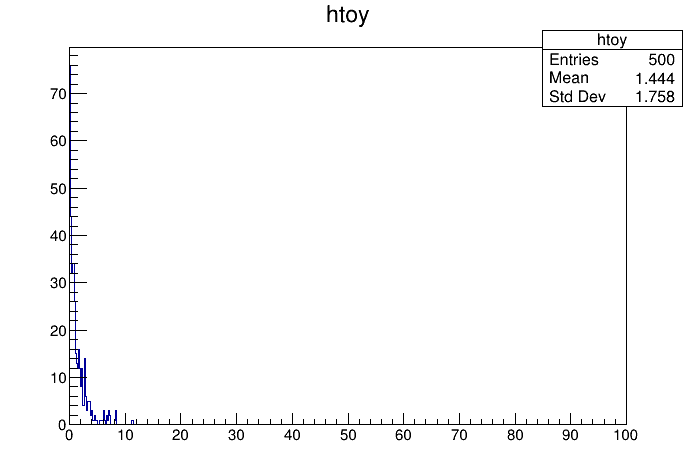

In [17]:
htoy = ROOT.TH1F("htoy", "htoy", 500, 0, 100)
mass.setConstant(True)

rand = ROOT.TRandom3()
for i in range(500):
    oneovertau.setVal(fittedValLambda)    
    toy = expo.generate(ROOT.RooArgSet(x), rand.Poisson(tree.GetEntries()))
    nlltoy = modelSB.createNLL(toy)
    profiletoy = nlltoy.createProfile(nsig)
    nsig.setVal(0)
    htoy.Fill(2*profiletoy.getVal())
    
htoy.Draw()
ROOT.gPad.Draw()

In [18]:
ntoy = htoy.GetEntries()
htoy.GetXaxis().SetRangeUser(qobs, 100)
p = float(htoy.Integral())/ntoy
print(p)

0.002
